In [4]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all" 

from __future__ import print_function


* Machine Learning 강의노트 
    
    https://wikidocs.net/book/587
    
Regression! 
   
- Regression : 예측 
- Classification : 분류 
    

# Linear Regression

## 1) Univariate Linear Regression

### Model Representation

데이터에 딱 맞는 관계식을 찾으면 좋지만 overfitting 이 일어 날 수 있고 고차원의 관계식일수록 찾기가 힘들다. 

Linear regression : 바로 주어진 데이터를 나타내는 최적의 직선

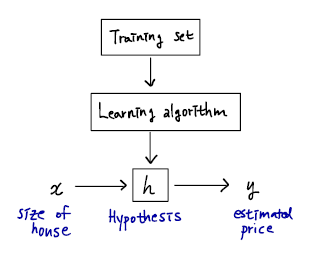


### The Hypothesis Function

Hypothesis : 함수로 input 과 output 을 가정함 (가설을 세움)

$h_{\theta}(x) = \theta_0 + \theta_1 x$

$\theta$ : coefficient


### Cost function

== loss 

hypothesis function의 정확도를 측정하기 위해 cost function을 이용

* cost function : error, error 이 적으면 비용이 적게 든다. 

* mean-squared-error (MSE) : $J(\theta_0, \theta_1) = \frac{1}{2m} \sum_{i=1}^{m} \left( \hat{y}^{(i)} - y^{(i)} \right)^2 
= \frac{1}{2m} \sum_{i=1}^{m} \left( h_\theta(x^{(i)}) - y^{(i)} \right)^2$

    $\theta$ 로 미분할때 식을 간단하게 하기위해서 1/2 을 붙임 
    
    $(\hat{y}^{(i)} - y^{(i)} )^2$ 거리가 멀수로 패널티, 음수를 방지함

* MSE 는 제곱함수여서 bowl-shiaped 가 보장된다. local 에 빠질 일이 없다. 

* Convex : bowl-shiaped

변수가 2개인경우 θ0과 θ1에 따라 크기가 변하는 3차원 그래프가 될 것이다.


## 2) Parameter Learning (Gradient Descent)

### Gradient Descent Algorithm


- α : learning rate
- $\frac{\partial}{\partial \theta_j} J(\theta_0. \theta_1) \quad$ : 편미분값 이동할 방향과 크기를 결정

repeat until convergence{

$\theta_j \color{limegreen}{:=} \theta_j - \color{salmon}{\alpha} \frac{\partial}{\partial \theta_j} J(\theta_0. \theta_1) \quad \text{for } \color{goldenrod}{j=0, j=1}$
}


대부분의 경우 최적값에 수렴할수록 편미분항의 크기가 작아져서 조금씩 업데이트되기 때문에 α 값을 수동으로 조절하지 않아도 된다.


### Gradient Descent for Linear Regression

$\begin{equation}
\begin{split}
    \frac{\partial}{\partial \theta_j} J(\theta_0, \theta_1) 
    &= \frac{\partial}{\partial \theta_j} 
        \left[ \frac{1}{2m} \sum_{i=1}^{m} 
            \left(  h_\theta(x^{(i)})-y^{(i)}  \right)^2 \right] \\
    &= \frac{\partial}{\partial \theta_j}
        \left[ \frac{1}{2m} \sum_{i=1}^{m} 
            \left(  \theta_0 + \theta_1 x^{(i)} - y^{(i)}  \right)^2 \right] \\
\end{split}
\end{equation}$



!! parameter들을 한번에 업데이트해야 한다. (connect)

* connect : simultaneous update<br>
    temp0 : $\theta_0$ d에 대한 미분값 <br>
    temp1 : $\theta_1$ d에 대한 미분값 <br> 
        temp1 에 사용하는 $\theta_0$ 값을 미분한 값이 아닌 미분하기 전 값을 동시에 구해서 update 함 <br>
    
* inconnect <br>
    temp0 : $\theta_0$ d에 대한 미분값 <br>
    temp1 : $\theta_1$ d에 대한 미분값 (temp0 output 값을 사용) <br>   
        temp1 에 사용하는 $\theta_0$ 값을 미분한 값을 사용하여 구해서 update 함 
    


## 3) Multivariate Linear Regression

### Multiple features

여러 개의 변수를 이용

- n : feature
- m : training 
- i : i번째 value
- j : j번째 feature


* 한 개 training example에 대한 hypothesis function의 vectorization

$h_\theta(x)=
\begin{bmatrix}
    \theta_0 & \theta_1 & ... & \theta_n
\end{bmatrix}
\begin{bmatrix}
    x_0 \\ x_1 \\ \vdots \\ x_n
\end{bmatrix}
= \theta^{T}x$


* hypothesis를 m×1 column vector

$X=
\begin{bmatrix}
    x_0^{(1)} & x_1^{(1)} \\
    x_0^{(2)} & x_1^{(2)} \\
    x_0^{(3)} & x_1^{(3)} 
\end{bmatrix}
,
\quad
\theta=
\begin{bmatrix}
    \theta_0 \\ \theta_1
\end{bmatrix}$


$h_\theta(X)=
\begin{bmatrix}
    \theta_0 & \theta_1 & ... & \theta_n \\
    \theta_0 & \theta_1 & ... & \theta_n
\end{bmatrix}
\begin{bmatrix}
    x_0 & x_0 \\ x_1 & x_1 \\ \vdots & \vdots  \\ x_n & x_n
\end{bmatrix}
= X\theta^{T}$


### Cost Function

$J(\theta) = \frac{1}{2m} (X\theta - y)^T(X\theta -y)$



Normal Equation

$ (X\theta - y)^T(X\theta -y)$  : 행렬의 제곱

$\theta = (X^T * X)^–1 * X^T*y$

### Matrix Notation

$\theta_0 := 
\theta_0 - \alpha\frac{1}{m} \sum_{i=1}^{m} \left( h_\theta( x^{(i)}) - y^{(i)} \right) x_0^{(i)}$
$\theta_1 := 
\theta_1 - \alpha\frac{1}{m} \sum_{i=1}^{m} \left( h_\theta( x^{(i)}) - y^{(i)} \right) x_0^{(i)}$

. . . .

$\theta := \theta - \alpha \nabla J(\theta)$

$ \nabla $ 델 (그레디언트) : 파라미터들에 대해서 편미분 한 값, 차원


$\theta_0$ 축에 대한 미분, $\theta_1$ 축에 대한 미분 .. 토기 형태의 3차원 값이 나옴 

##### 결론  :  $\theta := \theta - \frac{\alpha}{m} X^{T} (X\theta - \vec{y})$ 

- $X$  : m x (n+1) 차원
- $\theta$ : n x 1 차원 
- $\vec{y}$ : m x 1 차원

## 4) Gradient Descent in Practice

### Feature Scaling

모든 feature가 비슷한 범위에 있으면 gradient descent가 더 빠르게 수렴 할 수 있다. 

차원이 비슷할 수록 선형으로 수렴 할 수 있다. 

(아주 똑같을 필요는 없다.)


### Mean normalization

평균 정규화 : Feature Scaling는 각 feature 의 값을 range 로 나눈 반면 평균을 정규화 하는데 사용함 

평균만큼 좌표 이동


### Learning Rate

Gradient descent 가 제대로 작동을 안한다면, α 값을 줄이자.

Andrew Ng 는 α 값을 3씩 곱하거나 나누며 조절하는 것을 추천


## 5) Features and Polynomial Regression


### New Feature

여러개의 feature 를 사용하여 new feature 를 만들어 냄 


### Polynomial Regression

linear 뿐만 아니라 2차, 3차, 곡선 또는 제곱근 함수 등의 형태를 이용 할 수 있다.

feature 는 1개 인데 $x_1 + x_1^2$ (같은 x ) : 계산양이 증가함

예) 집의 면적이 증가할수록 집값이 증가하다가 감소 할수 있다.

주의! : 이렇게 feature를 만들면 feature scaling이 더욱 중요해진다.

_다변량 : $x_1 + x_2^2$ (다른 x ) _


## 6) Computing Parameters Analytically

### Normal Equation 

analytical solution을 직접 찾는 방법 

feature 의 개수와 식의 개수가 같을때 (인스턴스 개수) 해당 식으로 직접 연산하여 W 값을 구할 수 있다. 

한번에 최적의 해를 찾음


### 교제) 8.2 지역적 가중치가 부여된 선형 회귀

LWLR(locally weighted linear regression) : 평균제곱오류를 줄이는 방법 중 지역적 가중치가 부여된 선형회귀, 관심있는 데이터 점 근처에 있는 다른 데이터 점들에 가중치를 부여 가까운 점에 더 많은 가중치를 부여 


w(i,i) = $exp(- \frac{|x^i-x|}{2k^2}$)

k (지정) 값이 작아질수록 : 데이터에 더욱 fitting 될 수 있다. 

* 지수함수 

$e^{-i}$ 에서 i 값이 커지면 커질수록 0에 가까워지고 작을수록 수가 커짐 


# 03. Logistic Regression

### Classification

classification은 주어진 feature에 따라 데이터를 discrete한 class에 분류하는 방법

두개의 class 로 분류하는것 binary classification
$y \in \{ 0,1 \}$

- Class 0 (y=0): "Negative class"
- Class 1 (y=1): "Positive class"

### Linear Regression for Classification

threshold 이 '0.5' 가 되는 종양 크기 기준 크면 '악성(malignant), 그보다 작으면 '양성(benign)'

문제 : 이상값에 의해 달라질수 있다. 0과 1사이의 값만 갖는다. 

## 1) Hypothesis Representation

### Logistic Regression Model

Logistic regression 의 hypothesis function은 0과 1 사이의 값만 갖도록 

h(x) 를 변경: -무한대 < h(x) < 무한대 
    --> $0 \leq h_\theta(x) \leq 1$

* 'sigmoid function' 또는 'logistic function' 

    $h_\theta (x) = \frac{1}{1+e^{-\theta^T x}}$


### Interpretation of Hypothesis Output

$h_\theta (x) = P \left(  y=1 | 
\color{royalblue}{x}; \color{salmon}{\theta}  \right)$

- x: feature
- θ: model parameter

주어진 feature 가 xx라는 값을 가질 때 class 1에 들어갈 확률

y=1 (class 1)일 확률과 y=0 (class 0)일 확률은 합이 1

## 2) Decision Boundary

<img src="https://wikidocs.net/images/page/4288/logreg301.PNG"/>

hypothesis function hθ(x)=g(x)이 0.5 이상이 되는 경우는 
$z=\theta^{T}x\geq0$일 때

$y=
\begin{cases}
1 & \text{if } \theta^T x \ge 0 \\
0 & \text{if } \theta^T x < 0 
\end{cases}$


### Decision Boundary

최적의 parameter 를 가진 h(x)

$-3 + x_1 + x_2 = z(x) $

선위에 닿아 있는 점들은 h(x) = 0.5, 선보다 위쪽에 있는 점들은 h(x) > 0.5 

    sigmoid(z(x) = 0) = 0.5
    sigmoid(z(x) > 0) > 0.5
    sigmoid(z(x) < 0) < 0.5

decision boundary보다 위쪽에 찍히면 class 1에, 아래쪽에 찍히면 class 0에 넣으면 되는 것

decision boundary는 θ 에 의해 결정 : 최적의 parameter 를 가진 h(x)


### Non-Linear Decision Boundaries

직선으로 class를 구분할 수 없는 경우

polynomial 하게 feature dimension을 높이는 방법


## 3) Cost Function & Gradient Descent


### Logistic Regression Cost Function

참고 ) http://pythonkim.tistory.com/22

Hypothesis function(sigmoid) 함수 에 cost 함수를 MSE 를 사용하면 울퉁불퉁해져 local min 에 빠질수 있다.<br>
log 함수를 cost function 으로 사용해서 매끈매끈하게 만든다. (단, h 가 0 일때, 1일때 나눠서 log 함수를 사용해야함) 

* 정의

$\text{cost}\left( h_\theta (x), y \right) = 
\begin{cases}
-\log(h_\theta (x)) & \text{if }  y=1 \\
-\log(1-h_\theta (x)) & \text{if } y=0
\end{cases}$

y=1 and hθ(x)=0 즉, P(y=1|x;θ)=0 인 경우 learning algorithm에 큰 penalty를 주어야한다.


최종적으로, logistic regression의 cost function

$J(\theta) = - \frac{1}{m} 
\sum_{i=1}^{m} \left[ 
y^{(i)} \log h_\theta (x) +
(1-y^{(i)}) \log \left( 1-h_\theta (x) \right)
\right]$

* cost function의 특징
    - Maximum likelihood estimation criterion
    - Convex
    
### Gradient Descent

* hypothesis function 
    - linear : z = ax + b 
    - logistic : 1/exp(-z) 
    
* cost function
    - linear : MSE 사용
    - logistic : log() 를 사용 

MSE 가 convex 하고, log 가 convex 해서 둘다 GD 를 사용




# 교제) ch05. Logistic regression 

* hyperplane (초평면) : n차원을 나누는 n-1 차원 

* 분류로 사용 할 수 있는 함수 <br>
    logistic = sigmoid   <br>
    heaviside = unit step function (계단함수)

* 벡터 v 는 x 축으로의 벡터와 y 축으로의 벡터로 분리해 볼수 있음 

## 5.2 Using optimization to find the best regression coefficients

In [54]:
import numpy as np
import logRegres

In [55]:
def loadDataSet():
    dataMat = []; labelMat = []
    fr = open('data/ch05/testSet.txt')
    for line in fr.readlines():
        lineArr = line.strip().split()
        dataMat.append([1.0, float(lineArr[0]), float(lineArr[1])])
        labelMat.append(int(lineArr[2]))
    return dataMat,labelMat


In [46]:
dataMat,labelMat = loadDataSet()
dataMat[:10]
labelMat[:10]

[[1.0, -0.017612, 14.053064],
 [1.0, -1.395634, 4.662541],
 [1.0, -0.752157, 6.53862],
 [1.0, -1.322371, 7.152853],
 [1.0, 0.423363, 11.054677],
 [1.0, 0.406704, 7.067335],
 [1.0, 0.667394, 12.741452],
 [1.0, -2.46015, 6.866805],
 [1.0, 0.569411, 9.548755],
 [1.0, -0.026632, 10.427743]]

[0, 1, 0, 0, 0, 1, 0, 1, 0, 0]

In [31]:
# inX = W^Tx 
def sigmoid(inX):
    return 1.0/(1+np.exp(-inX))

### 5.2.2 Train: using gradient ascent to find the best parameters

In [1]:
np.mat?

Object `np.mat` not found.


In [47]:
# dataMatIn 100X3 classLabels 1X100
def gradAscent(dataMatIn, classLabels):
    dataMatrix = np.mat(dataMatIn)             #convert to NumPy matrix
    labelMat = np.mat(classLabels).transpose() #convert to NumPy matrix
    print(dataMatrix)
    print(labelMat)
    
    m,n = np.shape(dataMatrix)
    print(m, n)
    
    alpha = 0.001
    maxCycles = 500
    
    # 3x1
    weights = np.ones((n,1))
    for k in range(maxCycles):              #heavy on matrix operations
        h = sigmoid(dataMatrix*weights)     #matrix mult
        error = (labelMat - h)              #vector subtraction
        
        # GA 가 적용된 부분, 
        # + (GA 라서), alpha 3x1, dataMatrix.transpose() 3x100, error 100x1
        #  dataMatrix.transpose()  = > GA 의 cost funcstion, 모든점에대한 gradient 를 구함
        weights = weights + alpha * dataMatrix.transpose()* error #matrix mult
        
        # 3 개의 wegith 가 한번에 update 됨 
    return weights # knowledge representation

In [48]:
weights = gradAscent(dataMat,labelMat)

[[  1.00000000e+00  -1.76120000e-02   1.40530640e+01]
 [  1.00000000e+00  -1.39563400e+00   4.66254100e+00]
 [  1.00000000e+00  -7.52157000e-01   6.53862000e+00]
 [  1.00000000e+00  -1.32237100e+00   7.15285300e+00]
 [  1.00000000e+00   4.23363000e-01   1.10546770e+01]
 [  1.00000000e+00   4.06704000e-01   7.06733500e+00]
 [  1.00000000e+00   6.67394000e-01   1.27414520e+01]
 [  1.00000000e+00  -2.46015000e+00   6.86680500e+00]
 [  1.00000000e+00   5.69411000e-01   9.54875500e+00]
 [  1.00000000e+00  -2.66320000e-02   1.04277430e+01]
 [  1.00000000e+00   8.50433000e-01   6.92033400e+00]
 [  1.00000000e+00   1.34718300e+00   1.31755000e+01]
 [  1.00000000e+00   1.17681300e+00   3.16702000e+00]
 [  1.00000000e+00  -1.78187100e+00   9.09795300e+00]
 [  1.00000000e+00  -5.66606000e-01   5.74900300e+00]
 [  1.00000000e+00   9.31635000e-01   1.58950500e+00]
 [  1.00000000e+00  -2.42050000e-02   6.15182300e+00]
 [  1.00000000e+00  -3.64530000e-02   2.69098800e+00]
 [  1.00000000e+00  -1.96949

w0 : [[ 4.12414349],
w1 : [ 0.48007329],
w2 : [-0.6168482 ]] 

$z = W^TX$ 가 0 이 되는 점들을 찾음 


### 5.2.3 Analyze: plotting the decision boundary

In [51]:
import matplotlib.pyplot as plt

def plotBestFit(weights):

    dataMat,labelMat=loadDataSet()
    dataArr = np.array(dataMat)
    n = np.shape(dataArr)[0] 
    xcord1 = []; ycord1 = []
    xcord2 = []; ycord2 = []
    for i in range(n):
        # 클레스에 따라 나눔 
        if int(labelMat[i])== 1:
            xcord1.append(dataArr[i,1]); ycord1.append(dataArr[i,2])
        else:
            xcord2.append(dataArr[i,1]); ycord2.append(dataArr[i,2])
    fig = plt.figure()
    ax = fig.add_subplot(111)
    ax.scatter(xcord1, ycord1, s=30, c='red', marker='s')
    ax.scatter(xcord2, ycord2, s=30, c='green')
    x = np.arange(-3.0, 3.0, 0.1)
    y = (-weights[0]-weights[1]*x)/weights[2]
    ax.plot(x, y)
    plt.xlabel('X1'); plt.ylabel('X2');
    plt.show()
# (-weights[0]-weights[1]*x)/weights[2] : weights[2] 값이 음수가 나옴 (w2)

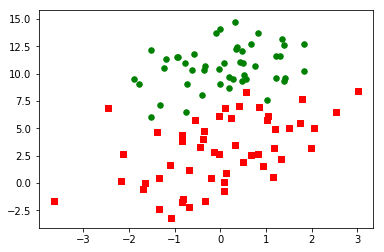

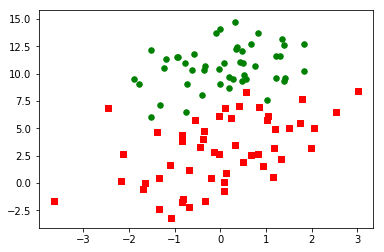

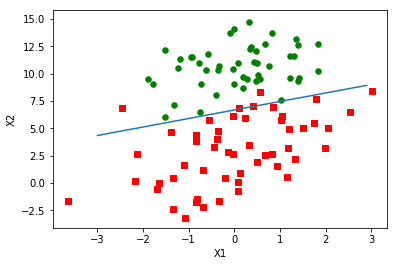

In [53]:
plotBestFit(weights.getA()) # getA() array 로 바꿈 

x1, x2 Feature 에 대한 평면에 대해서 z(x) 의 값을 그림 

## 5.2.4 Train: stochastic gradient ascent

* batch gradient 

    dataMatrix.transpose() : 모든 점에 대해서 한번에 계산을 함 <br> 
weights = weights + alpha * dataMatrix.transpose()* error 


* stochastic gradient 

    계산할때 한점만을 가져와서 연산함, 온라인 학습, 새로운 데이터가 <br> 
weights = weights + alpha * error * dataMatrix[i]


* 그외 달라진 부분 
    
    반복한 횟수가 많아질수록 학습률을 작게 함<br> 
alpha = 4/(1.0+j+i)+0.01 

    randIndex 랜덤하게 가져온 값으로 예측함 (중복선택가능)<br> 
h = sigmoid(sum(dataMatrix[randIndex]*weights))


In [ ]:
def stocGradAscent1(dataMatrix, classLabels, numIter=150):
    m,n = shape(dataMatrix)
    weights = ones(n)   #initialize to all ones
    for j in range(numIter):
        dataIndex = range(m)
        for i in range(m):
            alpha = 4/(1.0+j+i)+0.0001    #apha decreases with iteration, does not 
            randIndex = int(random.uniform(0,len(dataIndex)))#go to 0 because of the constant
            h = sigmoid(sum(dataMatrix[randIndex]*weights))
            error = classLabels[randIndex] - h
            weights = weights + alpha * error * dataMatrix[randIndex]
            del(dataIndex[randIndex])
    return weights